## Model Evaluation in Time Series

**Metrics**   
- Akaine Information Criterion 
- Sum of Square Error (SSE)

**Goal**  
- Use Evaluation Metrics to measure quality of time series models
- Explain what the metrics are measuring

**Definitions**  
- AIC 
> $$AIC = -2*log(maximum likelihood) + 2*(number of parameters in model) $$
$$AIC = log(\hat{\sigma}^2) + \frac{n+2p}{n}$$
with $\hat{\sigma}^2 = \frac{SSE}{n}$ and n is sample size.  
i.e. AIC give credit for minimizing the first term, and a penalty for making the model complex  

- SSE
> $$SSE = \sum{(y - \hat{y})^2}$$
In R 
```
m = arima(data, order = c(p,0,0), include.mean=FALSE)
SSE_p = sum(resid(m)^2)
```

**key points**  
AIC applies a penalty for model complexity (concept similar to regularization in machine learning models) while SSE does not apply a penalty.

### Example with simulated AR 

$$X_t = 0.7X_{t-1} -0.2X_{t-1} + Z_t$$

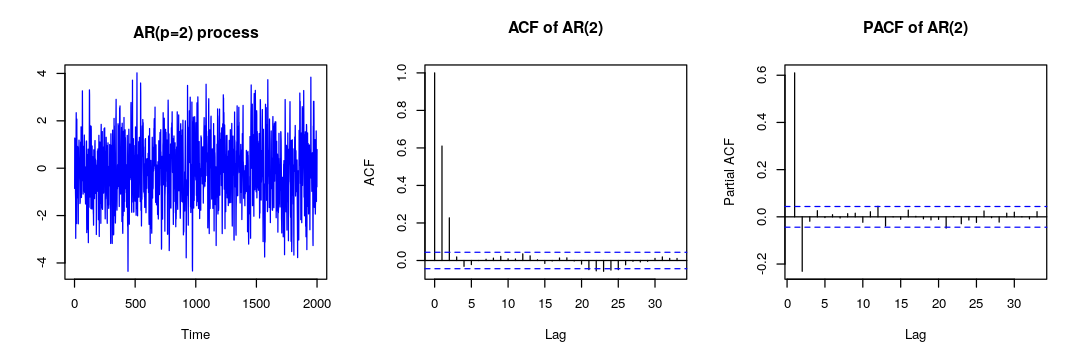

In [1]:
options(repr.plot.width=9, repr.plot.height=3)

phi1 = 0.7; phi2 = -0.2; N = 2000;
set.seed(2019)

data = arima.sim(list(order = c(2,0,0), ar = c(phi1, phi2)), n = N) 

# Partition output graphics as a multi frame of 2 rows and 1 column
par(mfrow=c(1,3))

# plot the process and plot its ACF
plot(data, main='AR(p=2) process', ylab=' ', col='blue')
acf(data, main='ACF of AR(2)')
acf(data, type='partial', main='PACF of AR(2)')

Indeed, the ACF has a decay structure, indication of AR process. The PACF ha a cut-off structure after lag 2, indication that the order might be 2, which is the case here because the example is simulated. In reality, ACF and PACF may not be sufficient to determine the structure of a model. 

### Etimating parameters using ARIMA procedure in R

In [2]:
order = c(2,0,0)
arima(data, order=order, include.mean=FALSE)


Call:
arima(x = data, order = order, include.mean = FALSE)

Coefficients:
         ar1      ar2
      0.7526  -0.2306
s.e.  0.0218   0.0218

sigma^2 estimated as 1.017:  log likelihood = -2855.09,  aic = 5716.19

### Comparing models

To compare models, we can compute the AIC or SSE for each of the models and select the model that minimizes the chosen metric. 

In [3]:
set.seed(2019)

phi1 = 0.7; phi2 = -0.2; N = 2000;
AIC = rep(0, 10)
SSE = rep(0, 10)

for (p in 1:10){
    params = arima(data, order=c(p, 0, 0), include.mean=FALSE)
    AIC[p] = params$aic
    SSE[p] = params$sigma
}

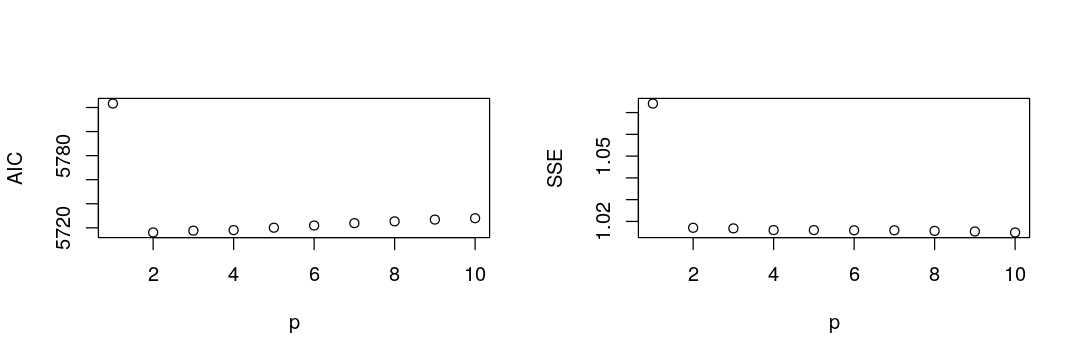

In [4]:
# Partition output graphics as a multi frame of 2 rows and 1 column
par(mfrow=c(1,2))
plot(AIC, xlab='p')
plot(SSE, xlab='p')

We see that AR(p=2) model has the minimum AIC. The SSE also shows thesame trend. AR(2) model should be selected in this case.